### Инструкция по выполнению

1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.
2. Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

    * Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
    * Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
    * Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.42. При необходимости округляйте дробную часть до двух знаков.

Обратите внимание, что, хотя в градиентного бустинге гораздо более слабые базовые алгоритмы, он выигрывает у случайного леса благодаря более "направленной" настройке — каждый следующий алгоритм исправляет ошибки имеющейся композиции. Также он обучается быстрее случайного леса благодаря использованию неглубоких деревьев. В то же время, случайный лес может показать более высокое качество при неограниченных ресурсах — так, он выиграет у градиентного бустинга на наших данных, если увеличить число деревьев до нескольких сотен (проверьте сами!).

Ответ на каждое задание — текстовый файл, содержащий ответ в первой строчке. Обратите внимание, что отправляемые файлы не должны содержать перевод строки в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над тем, чтобы убрать это ограничение.

In [17]:
import pandas as pd
from pathlib import Path
path = Path.cwd()
path = path.joinpath('../data/raw/HSE_ML_week5')

data = pd.read_csv(path.joinpath('gbm-data.csv'))
data.head(10)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
5,0,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,...,0,0,0,0,0,0,0,0,0,0
6,1,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,...,0,0,0,0,0,0,0,0,0,0
7,1,0.133333,0.610057,0.15,0.00,0.105176,0.759602,0.313393,0.491790,0.756010,...,0,0,1,0,1,0,0,0,0,0
8,1,0.000000,0.776816,0.05,0.00,0.458446,0.738631,0.246347,0.067800,0.751861,...,0,0,0,0,0,0,0,0,0,0
9,0,0.100000,0.768150,0.10,0.25,0.262299,0.598972,0.377065,0.394514,0.673797,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

y = data.values[:, 0]
X = data.values[:, 1:1774]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.8,
    random_state=241
)

      Iter       Train Loss   Remaining Time 
         1           1.0190           15.31s
         2           0.9246           13.70s
         3           0.8491           13.38s
         4           0.7722           13.36s
         5           0.7069           13.65s
         6           0.6672           13.54s
         7           0.6394           13.46s
         8           0.5763           13.58s
         9           0.5599           13.62s
        10           0.5445           13.60s
        20           0.2747           12.86s
        30           0.1705           13.53s
        40           0.1039           12.75s
        50           0.0682           12.03s
        60           0.0464           11.22s
        70           0.0300           10.48s
        80           0.0198            9.77s
        90           0.0136            9.13s
       100           0.0099            8.56s
       200           0.0002            2.83s
      Iter       Train Loss   Remaining Time 
        

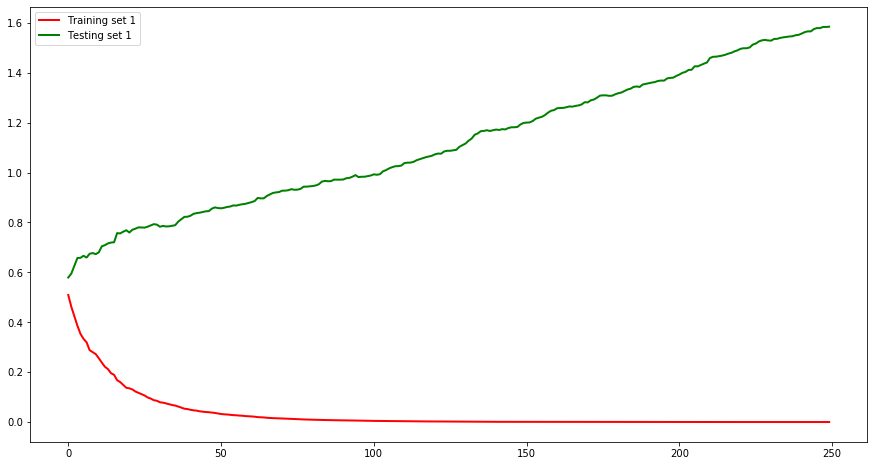

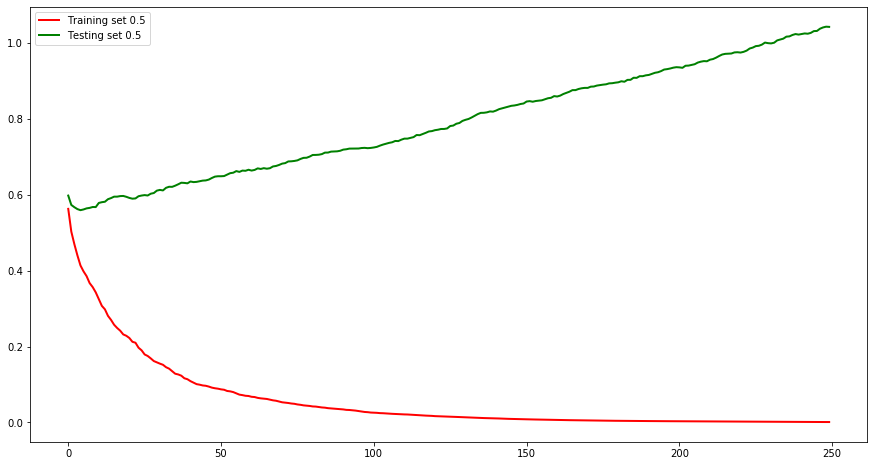

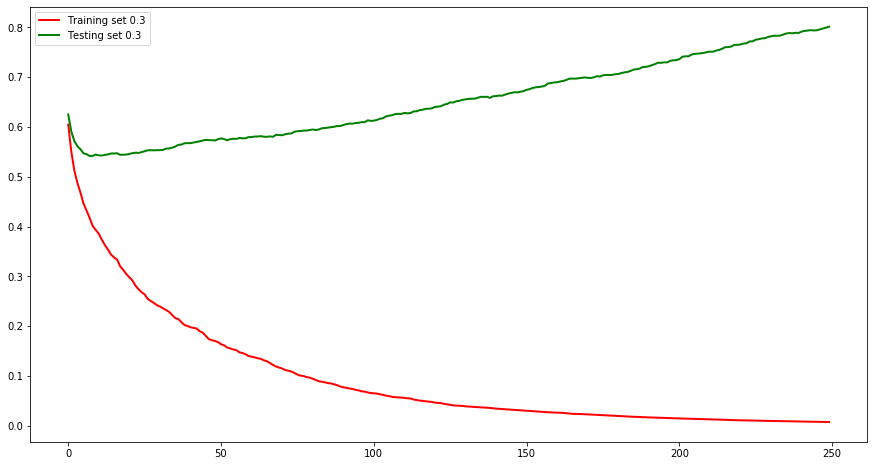

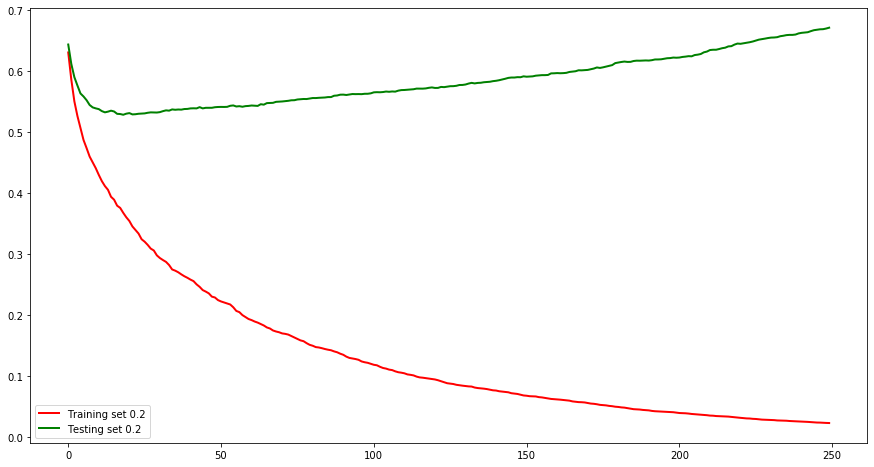

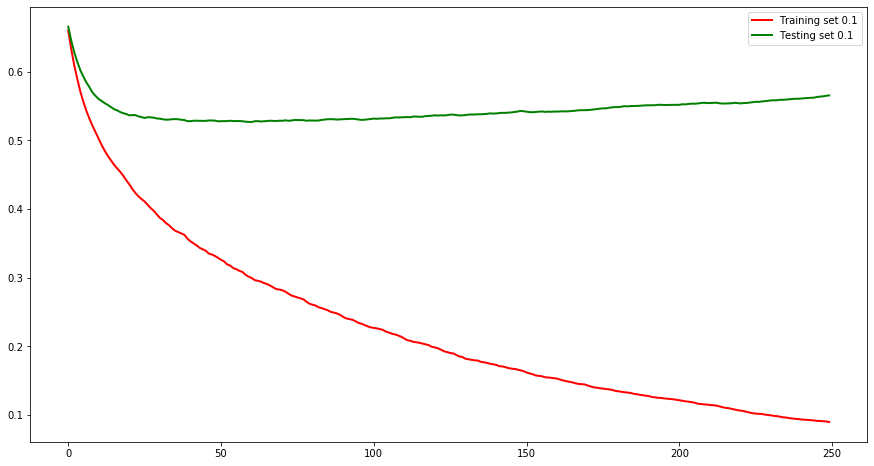

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline

def calc_and_plot_loss(y_pred_gen, y_true, color, label):
    loss_values = np.empty(shape=[250])
    index = 0
    for y_pred in y_pred_gen:
        loss_values[index] = log_loss(y_true, y_pred)
        index += 1
    
    plt.plot(loss_values, color=color, label=label, linewidth=2)
    plt.legend()

    
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(
        n_estimators=250,
        verbose=True,
        random_state=241,
        learning_rate=learning_rate
    )
    clf.fit(X_train, y_train)
    
    plt.figure(figsize=(15, 8))
    calc_and_plot_loss(
        clf.staged_predict_proba(X_train),
        y_train,
        'r',
        label='Training set ' + str(learning_rate)
    )
    calc_and_plot_loss(
        clf.staged_predict_proba(X_test),
        y_test,
        'g',
        label='Testing set ' + str(learning_rate)
    )
#     score_train = clf.staged_predict_proba(X_train)
#     score_test = clf.staged_predict_proba(X_test)
#     test_loss = log_loss(y_test, score_test)
#     train_loss = log_loss(y_train, score_train)

#     plt.figure(figsize=(15, 8))
#     plt.plot(test_loss, 'r', linewidth=2)
#     plt.plot(train_loss, 'g', linewidth=2)
#     plt.legend(['test', 'train'])

In [20]:
file = open('/home/topcoder2k/HSE_ML/HSE_ML_week5_answers/characteristic.txt', 'w')
file.write('overfitting')
file.close()

In [23]:
clf = GradientBoostingClassifier(
        n_estimators=250,
        verbose=True,
        random_state=241,
        learning_rate=0.2
    )
clf.fit(X_train, y_train)

iteration = 0
min_val = 1000
min_val_iter = 0
for y_pred in clf.staged_predict_proba(X_test):
    cur_loss_value = log_loss(y_test, y_pred)
    iteration += 1
    if cur_loss_value < min_val:
        min_val = cur_loss_value
        min_val_iter = iteration

print(min_val, min_val_iter)

      Iter       Train Loss   Remaining Time 
         1           1.2613           14.29s
         2           1.1722           14.05s
         3           1.1009           13.93s
         4           1.0528           14.23s
         5           1.0129           14.16s
         6           0.9739           14.06s
         7           0.9473           14.00s
         8           0.9194           13.86s
         9           0.9008           13.75s
        10           0.8814           13.46s
        20           0.7201           13.67s
        30           0.5950           12.58s
        40           0.5214           11.84s
        50           0.4482           11.14s
        60           0.3862           10.47s
        70           0.3427            9.89s
        80           0.3014            9.28s
        90           0.2723            8.71s
       100           0.2390            8.14s
       200           0.0787            2.80s
0.5283882097801942 19


In [24]:
file = open('/home/topcoder2k/HSE_ML/HSE_ML_week5_answers/min_log_loss.txt', 'w')
file.write('0.53 19')
file.close()

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
        n_estimators=19,
        random_state=241
    )
clf.fit(X_train, y_train)

print(log_loss(y_test, clf.predict_proba(X_test)))

0.5512965646723387


In [28]:
file = open('/home/topcoder2k/HSE_ML/HSE_ML_week5_answers/RFC_log_loss.txt', 'w')
file.write('0.55')
file.close()